# Introduction to Seaborn

Data Science  
TECNUN - Escuela de Ingeniería  
Universidad de Navarra

- Idoia Ochoa: iochoal@unav.es

Credits: Iñigo Apaolaza




Seaborn is built on top of Matplotlib and provides a higher-level interface for creating statistical graphics. This means that Seaborn requires less code to create complex visualizations compared to Matplotlib

First, we load the module.

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(style="darkgrid")

## Scatterplots

Scatterplots are used to relate variables. Let's load some data to create some examples.

In [ ]:
tips = sns.load_dataset("tips")
print(tips.shape)
tips.head()

(244, 7)


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


With this data, the first question we ask ourselves is whether the tip is related in any way to the price of the meal; in other words, we want to know if a higher meal price leads to a higher tip.

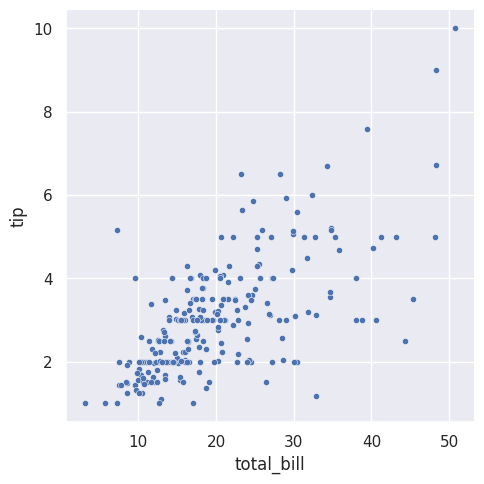

In [ ]:
# parameter `s` modifies the size of the points
sns.relplot(x = "total_bill", y = "tip",  data = tips, s = 20)

With the `hue` variable (hue semantic), we can add a third dimension to the plot using colors. This way, we can see that there is a positive correlation between the bill and the tip, but there is no notable difference between men and women.

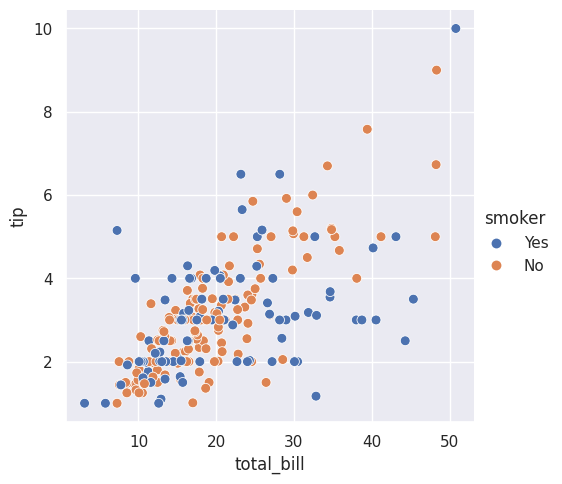

In [ ]:
sns.relplot(x = "total_bill", y = "tip", hue = "smoker", data = tips, s = 50)

Below, it shows how we can adjust the different parameters of the function to change the sizes, shapes, colors, etc., of the points.

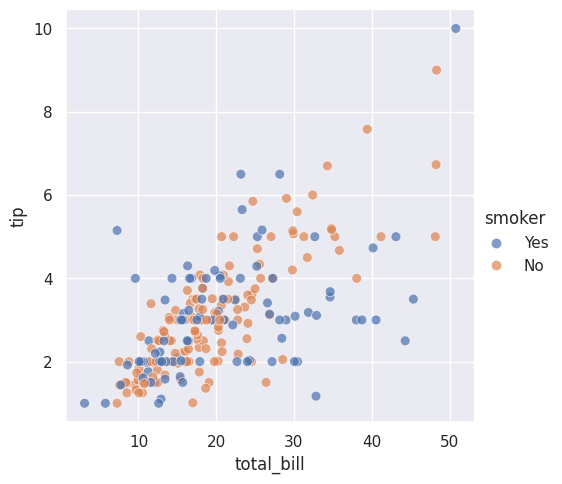

In [ ]:
# alpha for transparency
sns.relplot(x = "total_bill", y = "tip", hue = "smoker", data = tips, s = 50, alpha = 0.7)

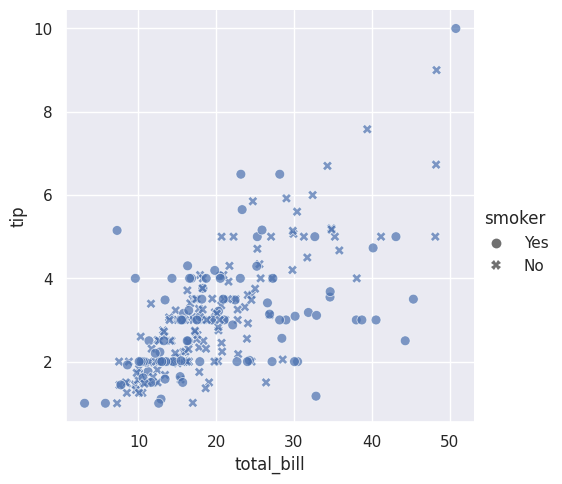

In [ ]:
# Change shape of points
sns.relplot(x = "total_bill", y = "tip", style = "smoker", data = tips, s = 50, alpha = 0.7)

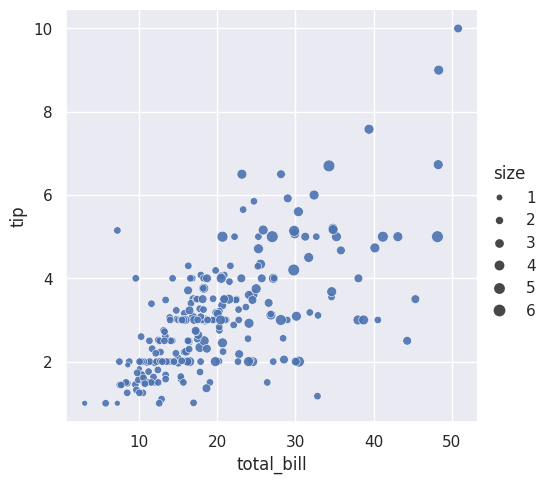

In [ ]:
# Size of points based on a value
sns.relplot(x = "total_bill", y = "tip", data = tips, alpha = 0.9, size = 'size')

So far, the `hue` parameter has been categorical. That's why the points are shown in two colors. If it is numerical, a continuous color palette will be displayed.

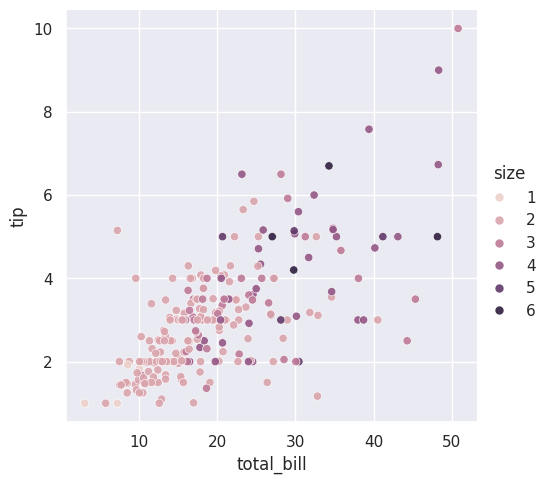

In [ ]:
sns.relplot(x = "total_bill", y = "tip", data = tips, alpha = 0.9, hue = 'size')

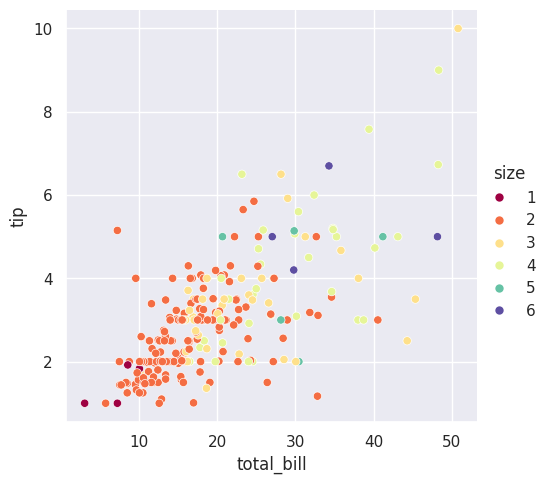

In [ ]:
# To modify the color palette.
sns.relplot(x = "total_bill", y = "tip", data = tips, hue = "size", palette="Spectral") # pastel

It's not highly recommended because it can be difficult to interpret, but we can add a fourth dimension to the plot by modifying the colors and shapes of the points separately.

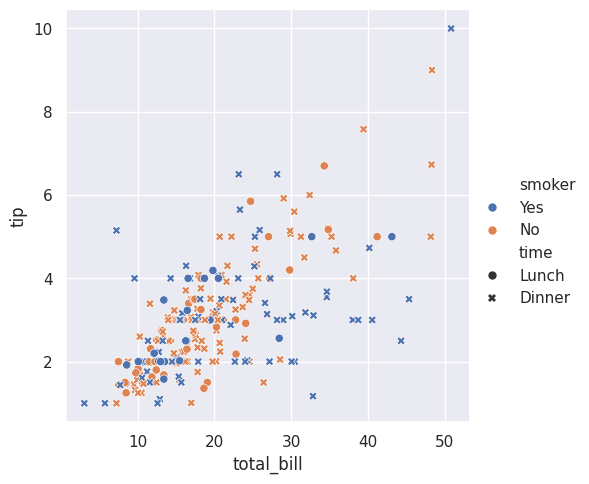

In [ ]:
sns.relplot(x = "total_bill", y = "tip", data = tips, hue = "smoker", style = 'time')

## Line charts

To plot time series, for example, line charts are a very good option. Let's simulate some data to create some examples.



In [ ]:
df = pd.DataFrame(dict(time = np.arange(500), value = np.random.randn(500).cumsum()))
df.head()

,time,value
0,0,0.400221
1,1,0.526904
2,2,1.036802
3,3,0.998567
4,4,0.300859


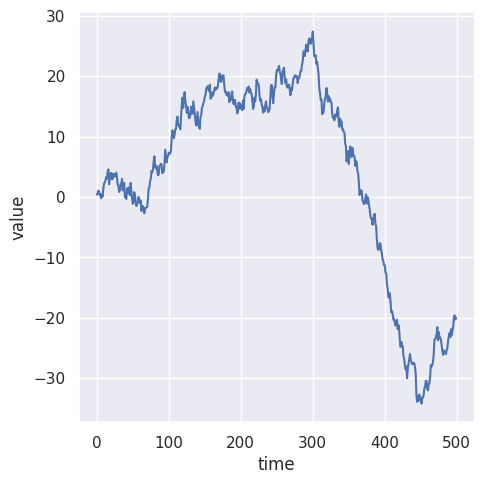

In [ ]:
g = sns.relplot(x = "time", y = "value", kind = "line", data = df)

By using the "hue" parameter, we can draw different lines on the same graph. To do this, we will first create a new dataframe with the variables "x", "y", and "label". The first 250 observations will have label A and the last 250 will have label B. Then, we will plot the graph.


In [ ]:
# Create a new df and add label column
df = pd.DataFrame(dict(x = np.concatenate((np.arange(250), np.arange(250))), y = np.random.randn(500).cumsum()))
df["label"] = 250*['A']+250*['B']
df.head()


,x,y,label
0,0,0.513535,A
1,1,0.040280,A
2,2,-0.144955,A
3,3,-0.246511,A
4,4,-2.076993,A


In [ ]:
df.tail()

,x,y,label
495,245,65.647340,B
496,246,64.947357,B
497,247,64.179465,B
498,248,64.383245,B
499,249,64.064858,B


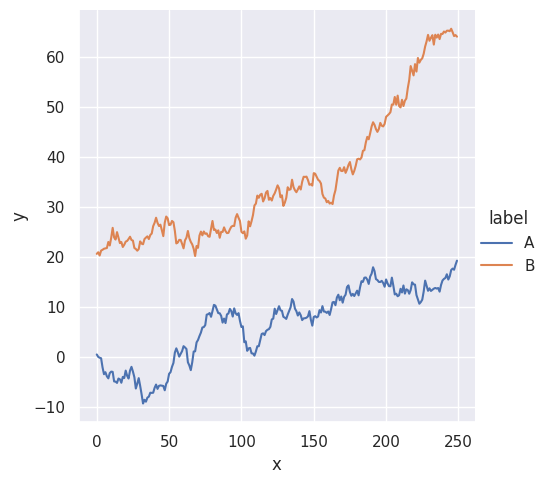

In [ ]:
sns.relplot(x='x', y='y', data = df, kind = 'line', hue = 'label')

Similarly, if we have different observations for the same x value, a shaded area is drawn around the line containing those values to show the dispersion. Additionally, we can also work by changing the line format to see subgroups.

In [ ]:
df = pd.DataFrame(dict(x = np.concatenate((np.arange(125), np.arange(125), np.arange(125), np.arange(125))), y = np.random.randn(500).cumsum()))
df["label"] = 250*['A']+250*['B']
df["label2"] = 125*['C']+125*['D']+125*['C']+125*['D']
df

,x,y,label,label2
0,0,-0.514252,A,C
1,1,-2.499337,A,C
2,2,-3.017863,A,C
3,3,-3.413027,A,C
4,4,-4.807915,A,C
...,...,...,...,...
495,120,14.864731,B,D
496,121,14.653445,B,D
497,122,15.223029,B,D
498,123,16.584418,B,D


In [ ]:

df.iloc[0:1,0:4]

,x,y,label,label2
0,0,-0.514252,A,C


In [ ]:
df.iloc[125:126,0:4]

,x,y,label,label2
125,0,2.330282,A,D


To finish with the line chart, it's worth mentioning that the other parameters available for scatterplots (size, palette...) can also be used for line charts.

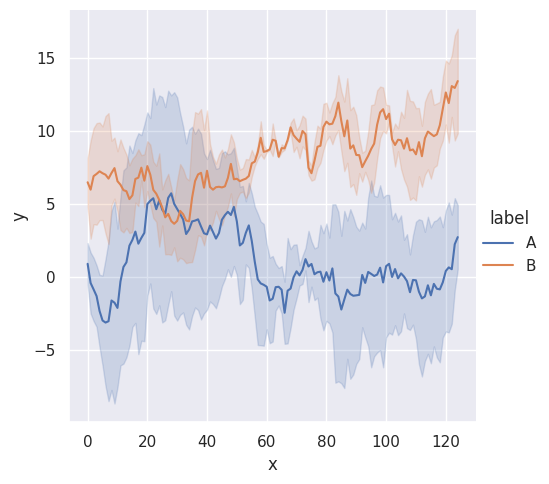

In [ ]:
sns.relplot(x='x', y='y', kind='line', data=df, hue='label')

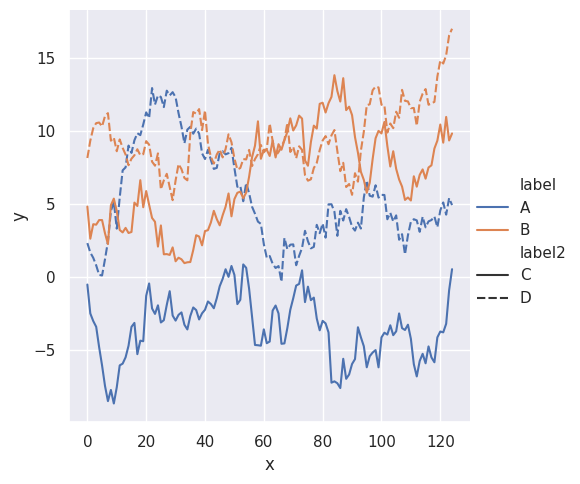

In [ ]:
sns.relplot(x='x', y='y', kind='line', data=df, hue='label', style='label2')

## Histograms

Let's simulate some data from a normal distribution and plot the corresponding histogram.

In [ ]:
x = np.random.randn(100)

<Axes: ylabel='Count'>

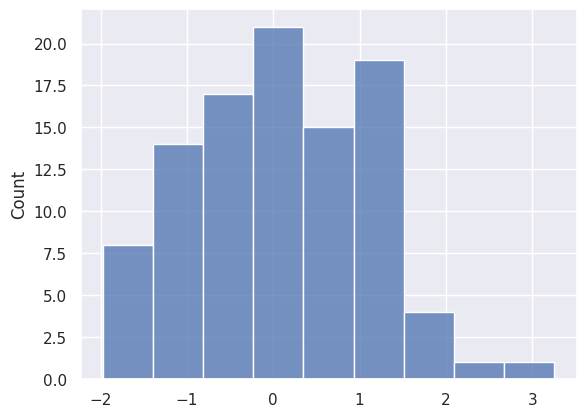

In [ ]:
sns.histplot(x)

Specify "kde = True" to plot also the density curve.

<Axes: ylabel='Count'>

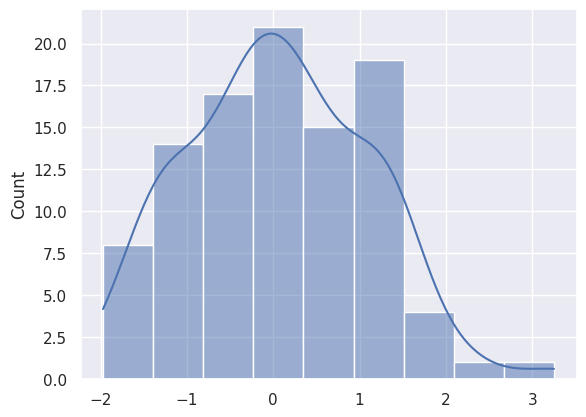

In [ ]:
sns.histplot(x, kde = 'True')

If we want to plot only the density curve, we will do the following:

<Axes: ylabel='Density'>

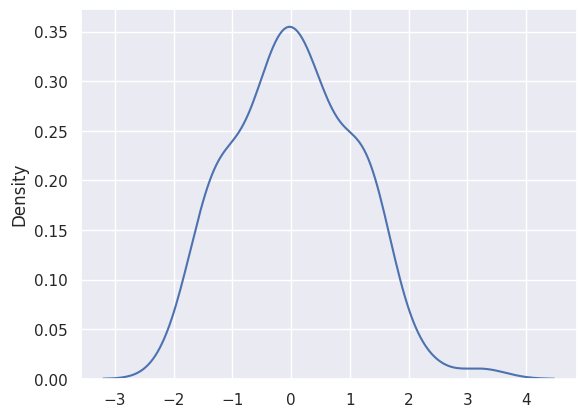

In [ ]:
sns.kdeplot(x)

## Categorical Scatterplots

Returning to the tips dataset, we will now draw different scatter plots that Seaborn provides for categorical variables.

In [ ]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


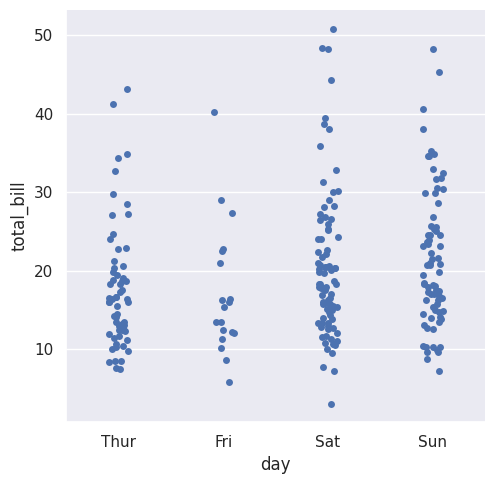

In [ ]:
sns.catplot(x = "day", y = "total_bill", data = tips, kind = 'strip')

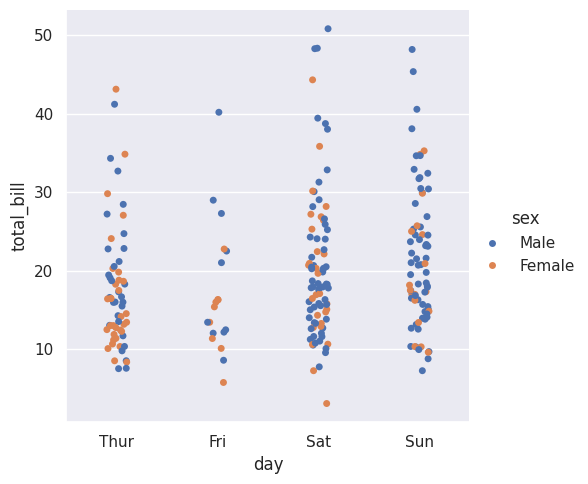

In [ ]:
sns.catplot(x = "day", y = "total_bill", data = tips, kind = 'strip', hue = 'sex')

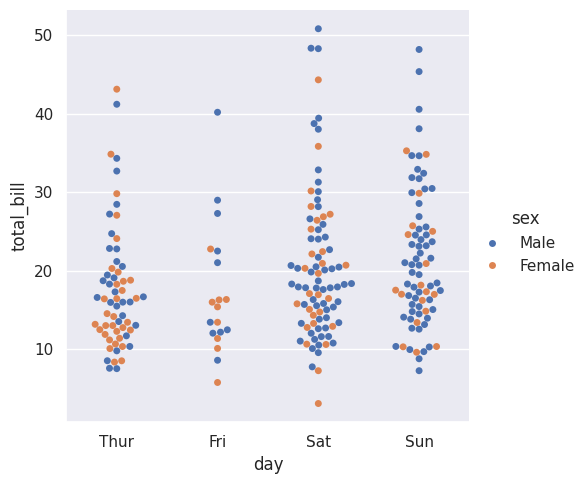

In [ ]:
# kind swarm so that the points are not overlapping
sns.catplot(x = "day", y = "total_bill", data = tips, kind = 'swarm', hue = 'sex')

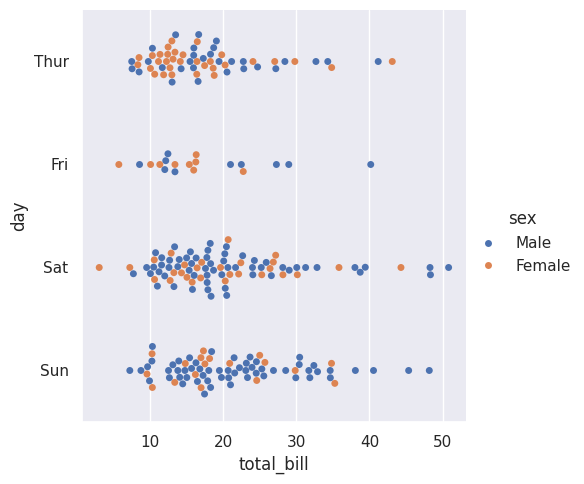

In [ ]:
sns.catplot(y = "day", x = "total_bill", data = tips, kind = 'swarm', hue = 'sex')

/usr/local/lib/python3.12/dist-packages/seaborn/categorical.py:3399: UserWarning: 14.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.12/dist-packages/seaborn/categorical.py:3399: UserWarning: 21.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.12/dist-packages/seaborn/categorical.py:3399: UserWarning: 12.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


/usr/local/lib/python3.12/dist-packages/seaborn/categorical.py:3399: UserWarning: 21.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


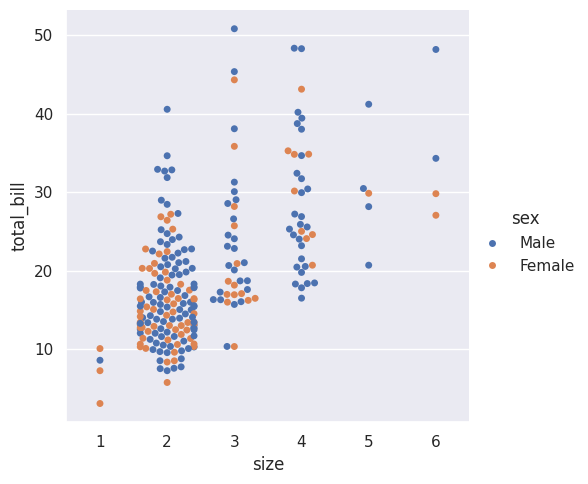

In [ ]:
# Plot only for parties bigger than 1
sns.catplot(x = "size", y = "total_bill", data = tips, kind = 'swarm', hue = 'sex')

/usr/local/lib/python3.12/dist-packages/seaborn/categorical.py:3399: UserWarning: 11.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


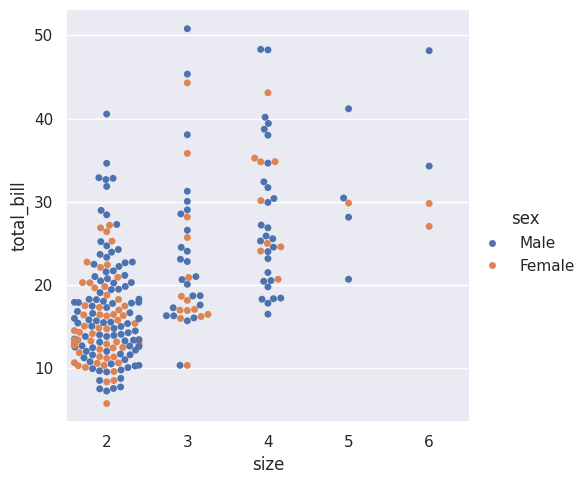

In [ ]:
sns.catplot(x = "size", y = "total_bill", data = tips[tips['size'] != 1], kind = 'swarm', hue = 'sex')

## Boxplots

Below are several box plots with different parameters that can be defined.

<Axes: xlabel='day', ylabel='total_bill'>

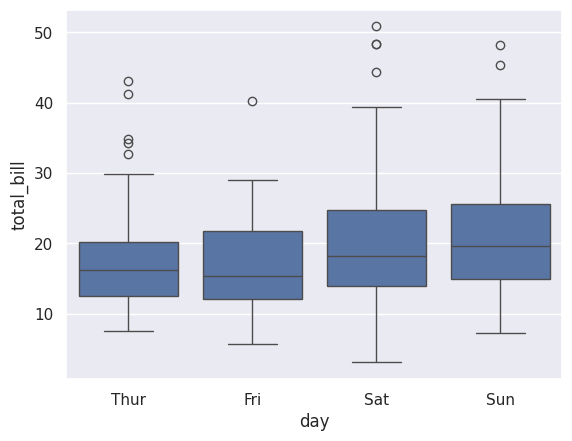

In [ ]:
sns.boxplot(x = "day", y = "total_bill", data = tips)

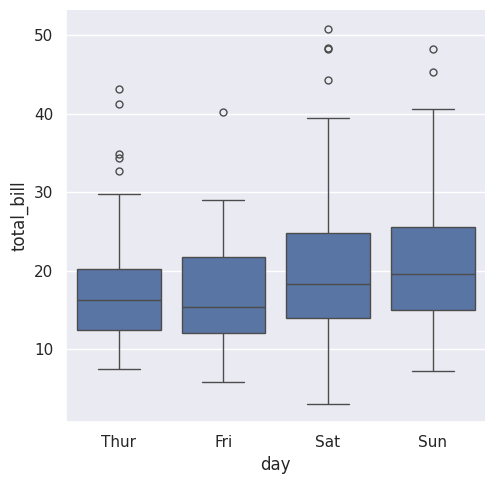

In [ ]:
sns.catplot(x = "day", y = "total_bill", data = tips, kind = 'box')

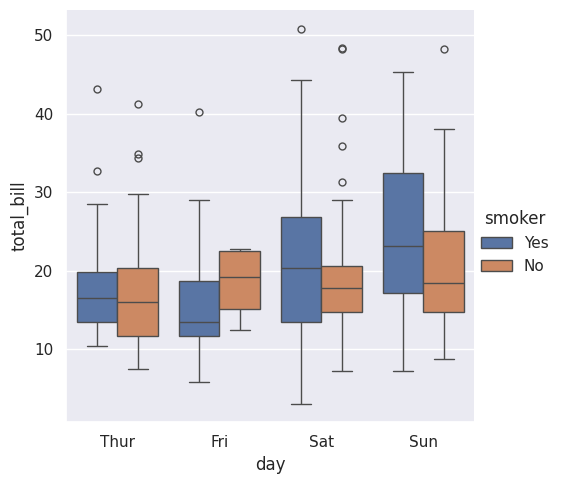

In [ ]:
sns.catplot(x = "day", y = "total_bill", data = tips, kind = 'box', hue = 'smoker')

## Violin Plots

Violin plots are very similar to box plots. The only difference is that instead of a box, they display the distribution of the values.

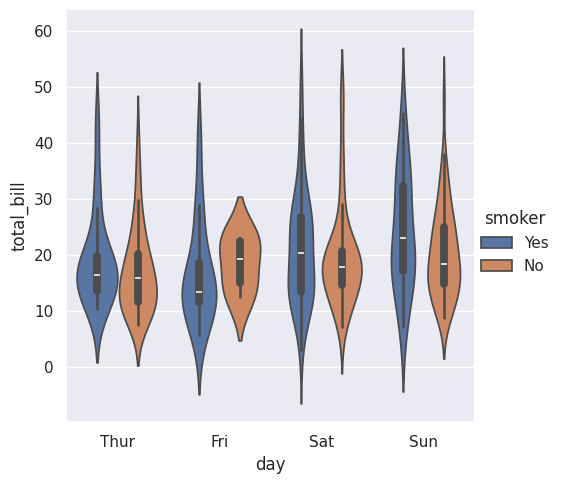

In [ ]:
sns.catplot(x = "day", y = "total_bill", data = tips, kind = 'violin', hue = 'smoker')

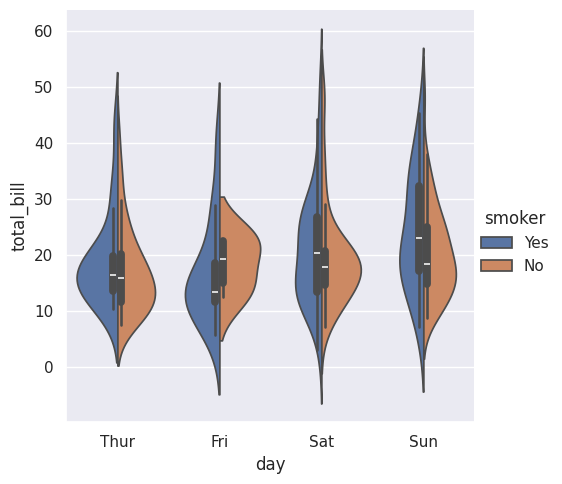

In [ ]:
# 'split = True' to show only  half
sns.catplot(x = "day", y = "total_bill", data = tips, kind = 'violin', hue = 'smoker', split = True)

## Bar charts

Let's use the Titanic data to draw bar charts.

In [ ]:
titanic = sns.load_dataset("titanic")
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
titanic.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True


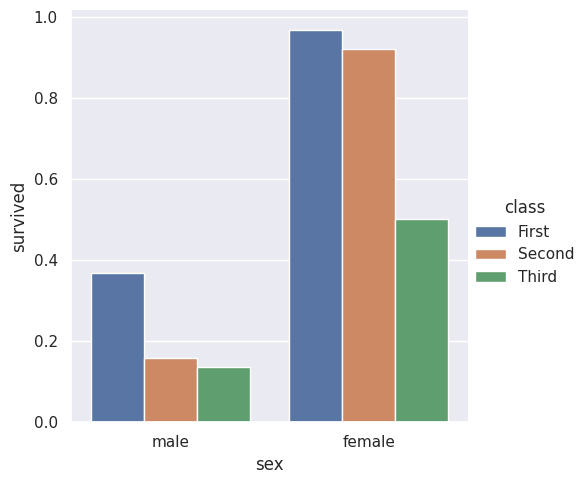

In [ ]:
# Bar chart to show survival rate of men and women based on the Class
sns.catplot(x = "sex", y = "survived", data = titanic, kind = 'bar', hue = 'class', errorbar=None)

In [ ]:
print(titanic[(titanic["sex"] == 'male') & (titanic["class"] == 'First')].survived.sum()/len(titanic[(titanic["sex"] == 'male') & (titanic["class"] == 'First')]))
print(titanic[(titanic["sex"] == 'male') & (titanic["class"] == 'Second')].survived.sum()/len(titanic[(titanic["sex"] == 'male') & (titanic["class"] == 'Second')]))
print(titanic[(titanic["sex"] == 'male') & (titanic["class"] == 'Third')].survived.sum()/len(titanic[(titanic["sex"] == 'male') & (titanic["class"] == 'Third')]))

print(titanic[(titanic["sex"] == 'female') & (titanic["class"] == 'First')].survived.sum()/len(titanic[(titanic["sex"] == 'female') & (titanic["class"] == 'First')]))
print(titanic[(titanic["sex"] == 'female') & (titanic["class"] == 'Second')].survived.sum()/len(titanic[(titanic["sex"] == 'female') & (titanic["class"] == 'Second')]))
print(titanic[(titanic["sex"] == 'female') & (titanic["class"] == 'Third')].survived.sum()/len(titanic[(titanic["sex"] == 'female') & (titanic["class"] == 'Third')]))


0.36885245901639346
0.1574074074074074
0.13544668587896252
0.9680851063829787
0.9210526315789473
0.5


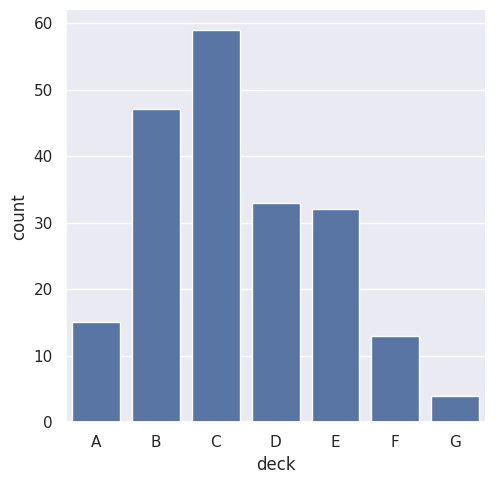

In [ ]:
# How many people boarded in each available Deck
sns.catplot(x = "deck", data = titanic, kind = 'count')

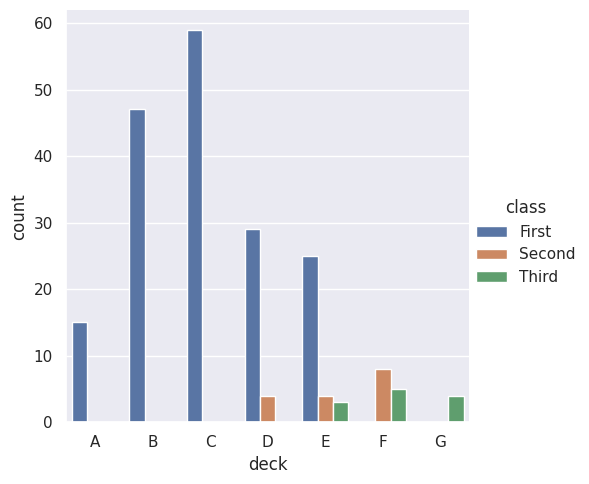

In [ ]:
sns.catplot(x = "deck", data = titanic, kind = 'count', hue = 'class')

## Graph panels

Seaborn allows you to draw panels with different plots.

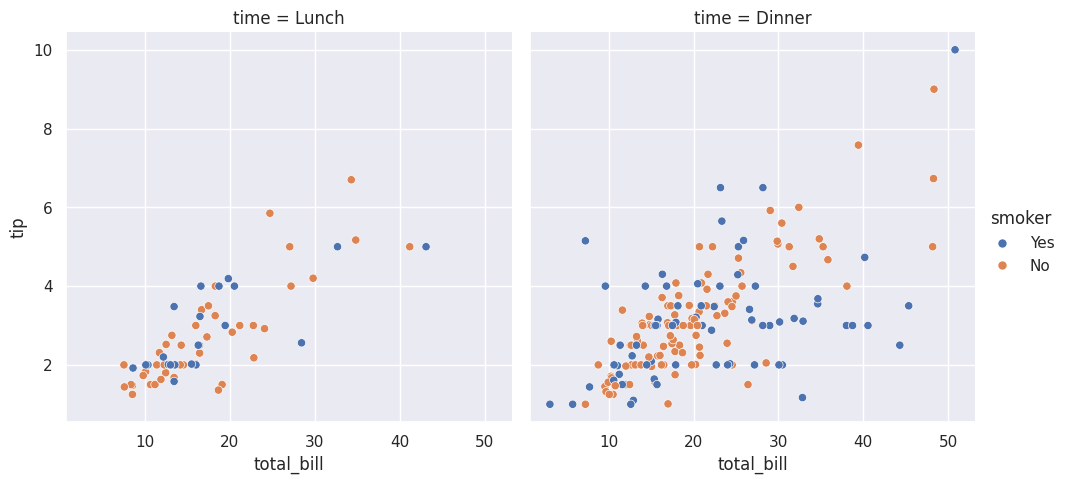

In [ ]:
# Use 'col = 'time'' to create two panels
sns.relplot(x = "total_bill", y = "tip", data = tips, hue = 'smoker', col = 'time')

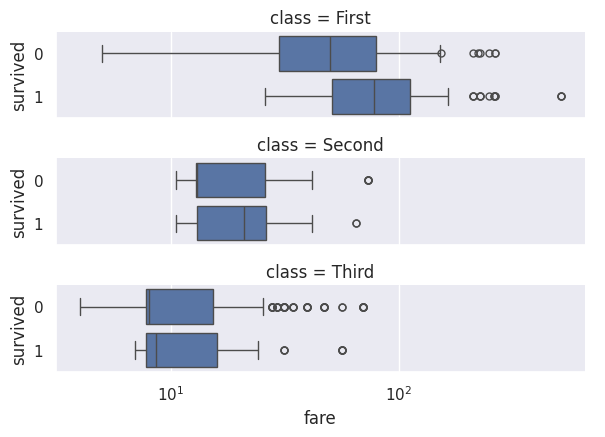

In [ ]:
# Use row input argument to make several panels based on 'class'
g = sns.catplot(x="fare", y="survived", row="class", kind="box", orient="h", height=1.5, aspect=4, data=titanic.query("fare > 0"))
g.set(xscale="log")

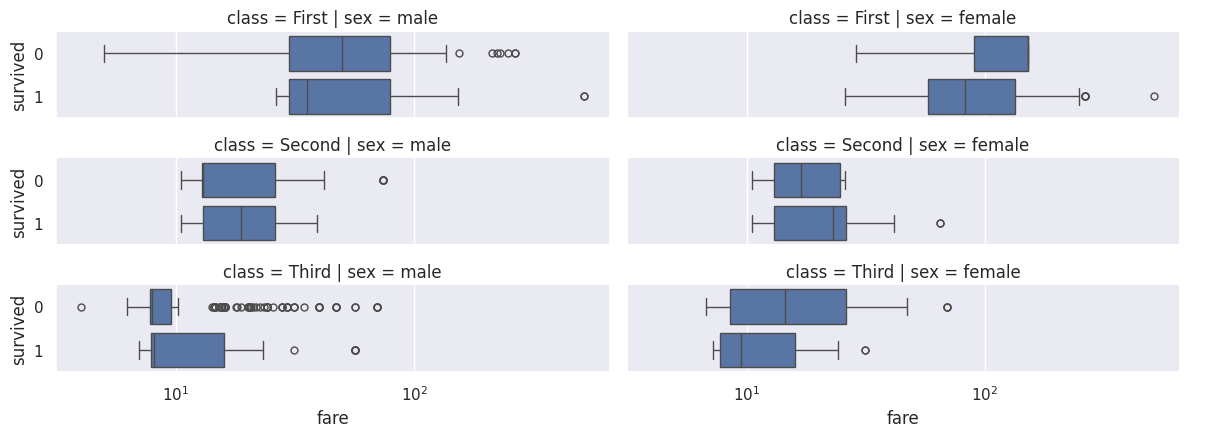

In [ ]:
g = sns.catplot(x="fare", y="survived", row="class", col = "sex", kind="box", orient="h", height=1.5, aspect=4, data=titanic.query("fare > 0"))
g.set(xscale="log")